# Random Oversampling

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from matplotlib import pyplot as plt

## 1. Importação dos Dados

Carregando e exibindo a base de dados:

In [2]:
df = pd.read_csv(r'C:\Users\arnon\OneDrive - tftc5\Documentos\DNC\Exercícios\Imbalanced Dataset\Exercício - Random Oversampling\dataset.csv')
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## 2. Exploração e Preparação dos Dados

Tamanho do banco de dados:

In [3]:
df.shape

(43400, 12)

Dimensão das categorias da variável _target_:

In [4]:
df['stroke'].value_counts()*100/len(df)

0    98.195853
1     1.804147
Name: stroke, dtype: float64

Percentual de nulos de cada coluna:

In [5]:
(df.isnull().sum()*100/len(df)).round(2).sort_values(ascending = False)

smoking_status       30.63
bmi                   3.37
id                    0.00
gender                0.00
age                   0.00
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level     0.00
stroke                0.00
dtype: float64

Dimensão de nulos de cada categoria em relação ao total da base de dados:

In [6]:
df[df['bmi'].isna() == True]['stroke'].value_counts()*100/len(df)

0    3.046083
1    0.322581
Name: stroke, dtype: float64

Como o resultado anterior mostra números muito pequenos, iremos excluir as linhas onde não temos valores "_inputados_" para a coluna "bmi":

In [7]:
df = df[df['bmi'].isna() == False]

Tipos de dados:

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Ajuste e "_dummificação_" do _dataset_:

In [9]:
df['id'] = df['id'].astype('category')
df = pd.get_dummies(df, columns = ['gender', 'work_type', 'Residence_type', 'smoking_status'], dummy_na = True)
df.columns = df.columns.str.lower()
df.drop(columns = ['gender_nan', 'work_type_nan', 'residence_type_nan'], inplace = True)
df['ever_married'].replace({'Yes': 1, 'No': 0}, inplace = True)
display(df)

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_female,gender_male,gender_other,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,work_type_children,residence_type_rural,residence_type_urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_nan
0,30669,3.0,0,0,0,95.12,18.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,30468,58.0,1,0,1,87.96,39.2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,16523,8.0,0,0,0,110.89,17.6,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,56543,70.0,0,0,1,69.04,35.9,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,46136,14.0,0,0,0,161.28,19.1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,0,58.64,20.4,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
43396,5450,56.0,0,0,1,213.61,55.4,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
43397,28375,82.0,1,0,1,91.94,28.9,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
43398,27973,40.0,0,0,1,99.16,33.2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


Análise descritiva dos dados:

In [10]:
df[['age', 'avg_glucose_level', 'bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41938.0,41.839290,22.483660,0.08,24.00,43.00,59.00,82.00
avg_glucose_level,41938.0,103.632645,42.229814,55.00,77.37,91.32,111.48,291.05
bmi,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60


## 3. Treinamento e Observação das Métricas com Dados Desbalanceados


Separando o _dataset_ em _features_ e _target_:

In [11]:
X = df.drop(columns = ['stroke'])
y = df[['stroke']]

Separando o _dataset_ em treino e teste:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### 3.1. Treinamento do Modelo

In [13]:
clf = RandomForestClassifier().fit(X_train, np.ravel(y_train))

### 3.2. Métricas

Valores preditos pelo modelo:

In [14]:
y_pred = clf.predict(X_test)

_Accuracy Score_:

In [15]:
accuracy_score(y_test, y_pred) * 100

98.4620886981402

_*_ É importante lembrar que o _accuracy score_ não é uma métrica muito eficiente para avaliar a eficiência de modelos de classificação que utilizam base de dados muito desbalanceadas.

Matriz de Confusão:

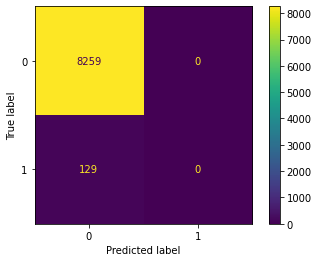

In [16]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

Pela análise do retorno acima, é possível perceber que o modelo performa a eficiência medida anteriormente pelo teste de acurácia é, na verdade, ilusória. O modelo só parece performar bem porque ele está desbalanceado e acaba ficando "viciado" na classe majoritária.

Importância das variáveis:

<AxesSubplot:>

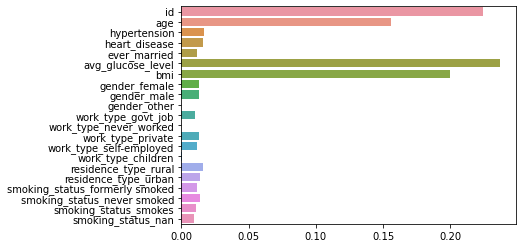

In [17]:
sns.barplot(y = X.columns, x = clf.feature_importances_)

## 4. Rebalancemento dos Dados com Random Oversampling


Criando o inicializador:

In [18]:
ros = RandomOverSampler(sampling_strategy = 'minority', random_state = 42)

Novos _datasets_ de _features_ e _target_:

In [19]:
X_ros, y_ros = ros.fit_resample(X, y)

## 5. Comparação das Distribuições entre os Dados Balanceados e Não Balanceados

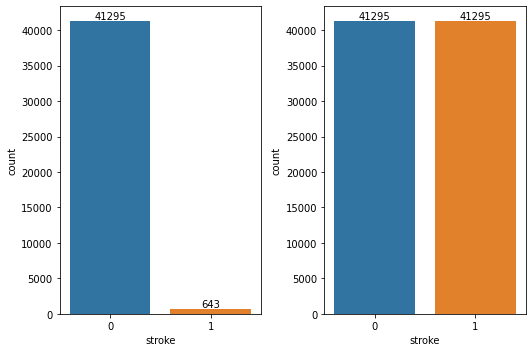

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (7.5, 5))
sns.countplot(x = y['stroke'], ax = axes[0])
axes[0].bar_label(container = axes[0].containers[0], labels = y['stroke'].value_counts())
sns.countplot(x = y_ros['stroke'], ax = axes[1])
axes[1].bar_label(container = axes[1].containers[0], labels = y_ros['stroke'].value_counts())
plt.tight_layout()
plt.show()

## 6. Comparação com Duas Dimensões de um PCA com os Dados Balanceados e Desbalanceados

Importando a biblioteca necessária:

In [21]:
from sklearn.decomposition import PCA

Criando as instâncias de PCA:

In [22]:
PCA_desbal = PCA(n_components = 2)
PCA_ros = PCA(n_components = 2)

"_Fittando_" as instâncias:

In [23]:
PCA_desbal_fit = PCA_desbal.fit_transform(X)
PCA_ros_fit = PCA_ros.fit_transform(X_ros)


Printando as métricas:

In [24]:
print(PCA_desbal.explained_variance_ratio_)
print(PCA_ros.explained_variance_ratio_)

[9.99994628e-01 4.16385635e-06]
[9.99992113e-01 6.69217323e-06]


## 7. Treinamento e Observação das Métricas com Dados Balanceados

Separando o _dataset_ balanceado em treino e teste:

In [25]:
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 42)

### 7.1. Treinamento do Modelo

In [26]:
clf_ros = RandomForestClassifier().fit(X_ros_train, np.ravel(y_ros_train))

### 7.2. Métricas

Valores preditos pelo modelo:

In [27]:
y_ros_pred = clf_ros.predict(X_ros_test)

_Accuracy score_:

In [28]:
accuracy_score(y_ros_test, y_ros_pred) * 100

99.94551398474391

Matriz de confusão:

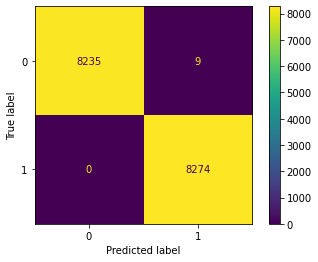

In [29]:
ConfusionMatrixDisplay.from_estimator(clf_ros, X_ros_test, y_ros_test)

Pela análise do retorno acima, é possível perceber que, dessa vez, o modelo performou com - quase - perfeição.

Importância das variáveis:

<AxesSubplot:>

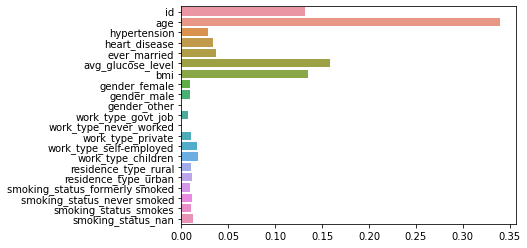

In [30]:
sns.barplot(y = X_ros.columns, x = clf_ros.feature_importances_)

## 8. Comparação da Importância das _Features_ entre o Modelo Balanceado e Não Balanceado

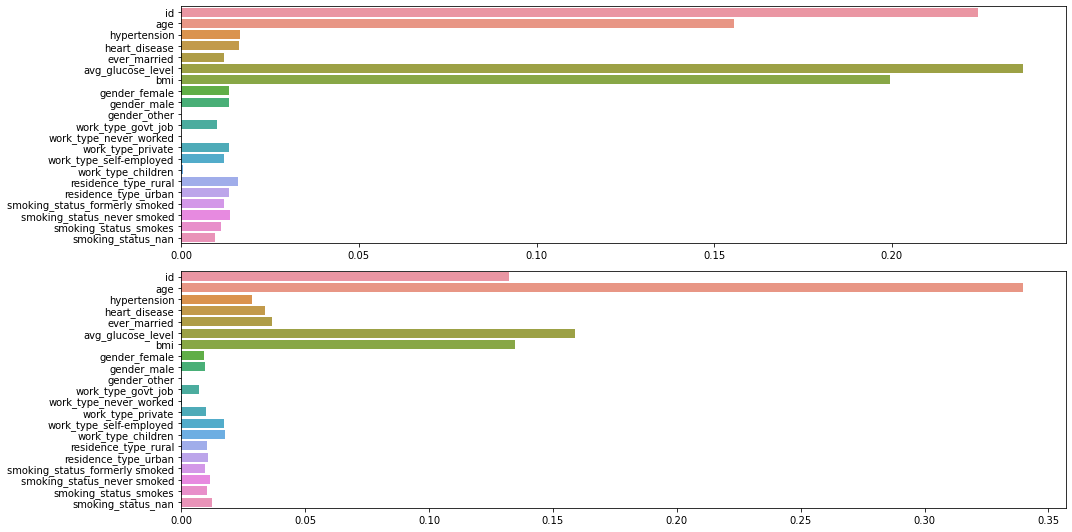

In [31]:
fig, axes = plt.subplots(2, 1, figsize = (15, 7.5))
sns.barplot(y = X.columns, x = clf.feature_importances_, ax = axes[0])
sns.barplot(y = X_ros.columns, x = clf_ros.feature_importances_, ax = axes[1])
plt.tight_layout()
plt.show()

Por meio da análise do retorno acima, é possível perceber que houve uma grande mudança na influência, principalmente, das variáveis "id", "age", "avg_glucose_level" e "bmi" quando a base foi balanceada.

## 9. Comparação de Métricas entre o Modelo Treinado com Dados Balanceados e Desbalanceados

Métricas do modelo desbalanceado:

In [32]:
print(metrics.classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388



Métricas do modelo balanceado:

In [33]:
print(metrics.classification_report(y_ros_test, y_ros_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8244
           1       1.00      1.00      1.00      8274

    accuracy                           1.00     16518
   macro avg       1.00      1.00      1.00     16518
weighted avg       1.00      1.00      1.00     16518

